In [1]:
import sys
import os

%matplotlib inline
    
from smfret_analysis import print_info, Plotter

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print_info()

smFRET analysis software version 2.0
(git revision 2.0)
Output version 8
Using sdt-python version 13.2.dev


In [4]:
p = Plotter()

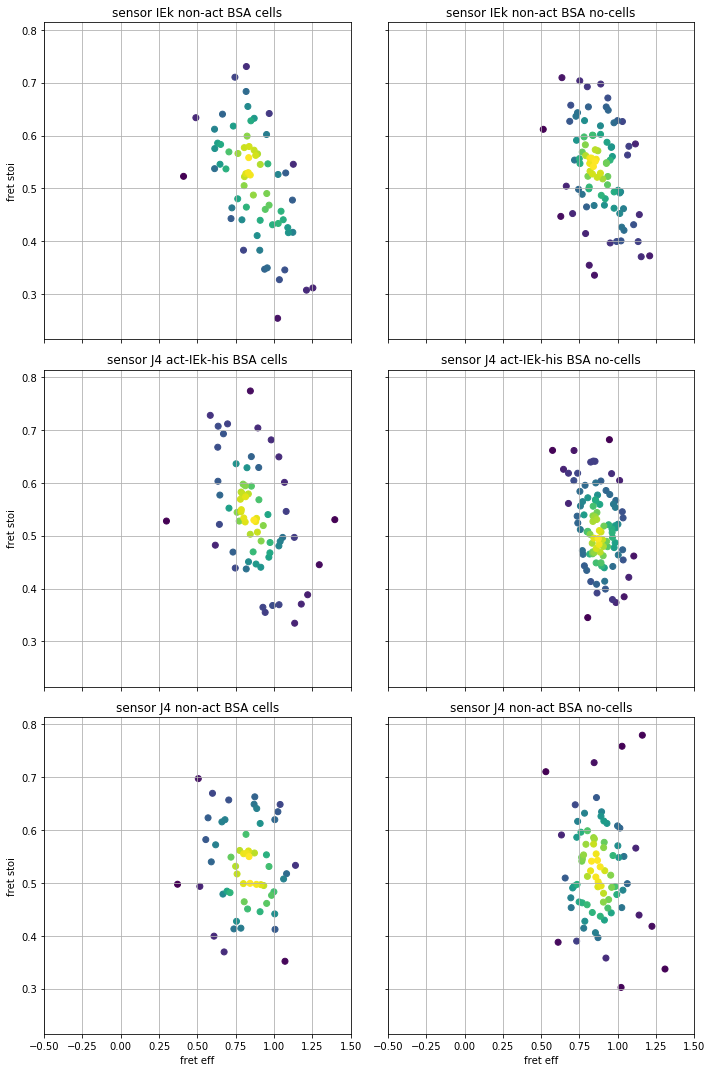

In [5]:
p.scatter(frame=2, xlim=(-0.5, 1.5));

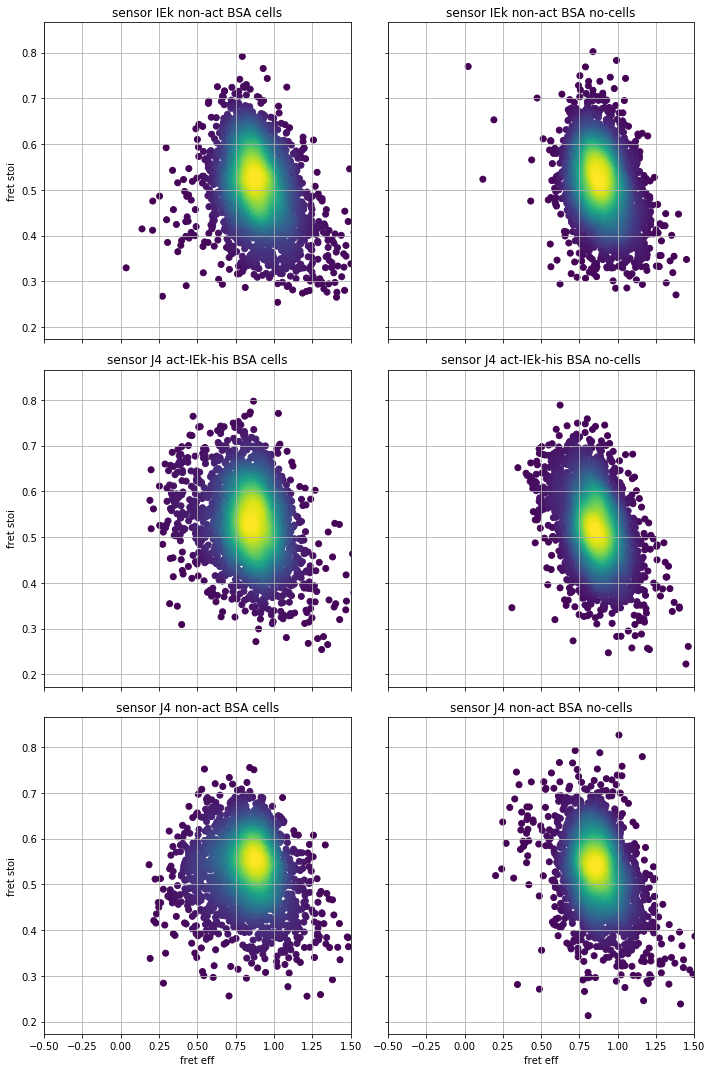

In [6]:
p.scatter(frame=None, xlim=(-0.5, 1.5));

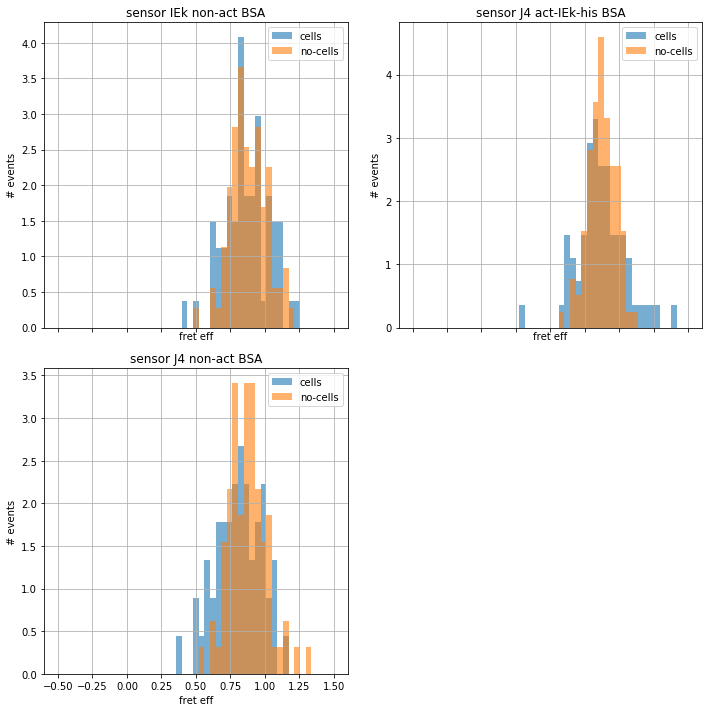

In [7]:
p.hist(frame=2, group_re=(r"(.+) (cells|no-cells)", 1, 2),
       hist_args={"alpha": 0.6, "density": True});

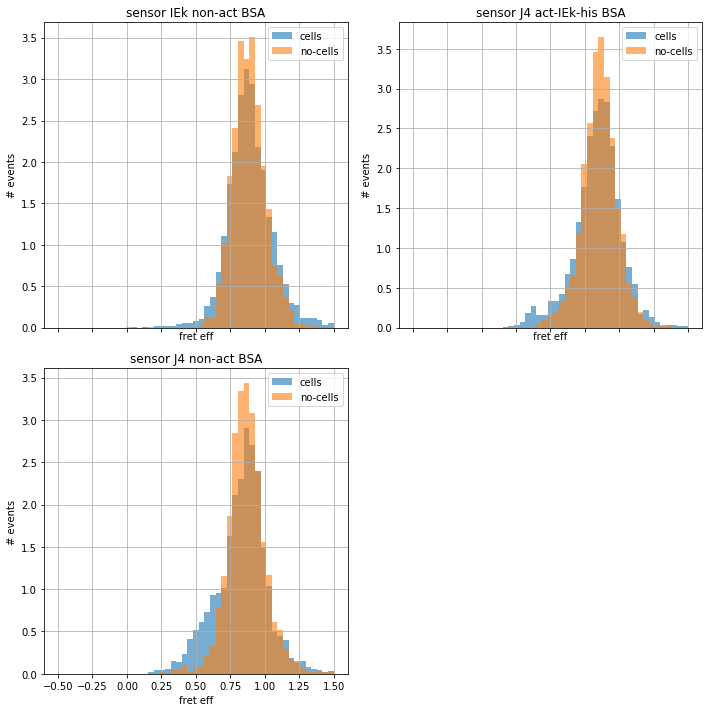

In [8]:
p.hist(group_re=(r"(.+) (cells|no-cells)", 1, 2),
       hist_args={"alpha": 0.6, "density": True});